# **MI PROYECTO**


## **FASE 1**

### Se identifico como varables clave las columnas del siguiente dataframe

In [309]:
import pandas as pd
data=pd.read_csv('datset.csv')

data

,ORDEN,CLASE,MARCA,MODELO,FECHA MATRICULA/RADICACION,AÑO,MES,DIA
0,1,MOTOCICLETA,YAMAHA,2000,02/02/2000,2000,02.febrero,02.miércoles
1,2,MOTOCICLETA,SUZUKI,2000,23/02/2000,2000,02.febrero,23.miércoles
2,3,MOTOCICLETA,AUTECO KAWASAKI,2000,25/09/2000,2000,09.septiembre,25.lunes
3,4,AUTOMOVIL,RENAULT,1988,18/09/2000,2000,09.septiembre,18.lunes
4,5,CAMIONETA,CHEVROLET,1988,24/03/2000,2000,03.marzo,24.viernes
...,...,...,...,...,...,...,...,...
16938,16939,MOTOCICLETA,BAJAJ,2022,21/01/2022,2022,01.enero,21.viernes
16939,16940,MOTOCICLETA,VICTORY,2022,27/01/2022,2022,01.enero,27.jueves
16940,16941,MOTOCICLETA,BAJAJ,2022,25/01/2022,2022,01.enero,25.martes
16941,16942,MOTOCICLETA,BAJAJ,2022,28/01/2022,2022,01.enero,28.viernes


## **FASE 2**

### Se realizara la limpieza correspondiente

In [312]:
print(data.isnull().sum())


ORDEN                         0
CLASE                         0
MARCA                         0
MODELO                        0
FECHA MATRICULA/RADICACION    0
AÑO                           0
MES                           0
DIA                           0
dtype: int64


In [313]:
falta=data[data.isnull().any(axis=1)] 

falta



,ORDEN,CLASE,MARCA,MODELO,FECHA MATRICULA/RADICACION,AÑO,MES,DIA


In [314]:
print(data.duplicated().sum())


0


### se realizo el respectivo ajuste de formatos

In [316]:

data['mes_num'] = data['MES'].str.extract(r'(\d{2})')
data['dia_num'] = data['DIA'].str.extract(r'(\d{2})')


data['fecha_ajustada'] = pd.to_datetime(
    data['AÑO'].astype(str) + '-' +
    data['mes_num'] + '-' +
    data['dia_num'],
    errors='coerce'
)

data['FECHA MATRICULA/RADICACION'] = data['fecha_ajustada']

data = data.drop(columns=['mes_num', 'dia_num', 'fecha_ajustada'])

data["FECHA MATRICULA/RADICACION"] = pd.to_datetime(data["FECHA MATRICULA/RADICACION"])

data




,ORDEN,CLASE,MARCA,MODELO,FECHA MATRICULA/RADICACION,AÑO,MES,DIA
0,1,MOTOCICLETA,YAMAHA,2000,2000-02-02,2000,02.febrero,02.miércoles
1,2,MOTOCICLETA,SUZUKI,2000,2000-02-23,2000,02.febrero,23.miércoles
2,3,MOTOCICLETA,AUTECO KAWASAKI,2000,2000-09-25,2000,09.septiembre,25.lunes
3,4,AUTOMOVIL,RENAULT,1988,2000-09-18,2000,09.septiembre,18.lunes
4,5,CAMIONETA,CHEVROLET,1988,2000-03-24,2000,03.marzo,24.viernes
...,...,...,...,...,...,...,...,...
16938,16939,MOTOCICLETA,BAJAJ,2022,2022-01-21,2022,01.enero,21.viernes
16939,16940,MOTOCICLETA,VICTORY,2022,2022-01-27,2022,01.enero,27.jueves
16940,16941,MOTOCICLETA,BAJAJ,2022,2022-01-25,2022,01.enero,25.martes
16941,16942,MOTOCICLETA,BAJAJ,2022,2022-01-28,2022,01.enero,28.viernes


In [317]:
print(data.isnull().sum())

ORDEN                         0
CLASE                         0
MARCA                         0
MODELO                        0
FECHA MATRICULA/RADICACION    0
AÑO                           0
MES                           0
DIA                           0
dtype: int64


## **FASE 3**

In [319]:
data_2=data.loc[:,["CLASE"]]
data_2

,CLASE
0,MOTOCICLETA
1,MOTOCICLETA
2,MOTOCICLETA
3,AUTOMOVIL
4,CAMIONETA
...,...
16938,MOTOCICLETA
16939,MOTOCICLETA
16940,MOTOCICLETA
16941,MOTOCICLETA


In [320]:
import numpy as np

datanp=data_2.to_numpy()
    



In [321]:
clases_unicas, conteos = np.unique(datanp, return_counts=True)
for clase, count in zip(clases_unicas, conteos):
    print(f"{clase}: {count}")

AUTOMOVIL: 3965
BUS: 109
BUSETA: 68
CAMION: 825
CAMIONETA: 1357
CAMPERO: 976
CICLOMOTOR: 3
CUATRIMOTO: 5
MAQUINARIA AGRICOLA: 3
MAQUINARIA INDUSTRIAL: 1
MICROBUS: 115
MINITRACTOR: 1
MOTOCARRO: 50
MOTOCICLETA: 9047
MOTOTRICICLO: 2
REMOLQUE: 20
SEMIREMOQLUE: 6
TRACTO CAMION: 256
VOLQUETA: 134


In [322]:
print(clases_unicas)
print(type(clases_unicas))

['AUTOMOVIL' 'BUS' 'BUSETA' 'CAMION' 'CAMIONETA' 'CAMPERO' 'CICLOMOTOR'
 'CUATRIMOTO' 'MAQUINARIA AGRICOLA' 'MAQUINARIA INDUSTRIAL' 'MICROBUS'
 'MINITRACTOR' 'MOTOCARRO' 'MOTOCICLETA' 'MOTOTRICICLO' 'REMOLQUE'
 'SEMIREMOQLUE' 'TRACTO CAMION' 'VOLQUETA']
<class 'numpy.ndarray'>


In [323]:
 maximo=np.max(conteos)
print('el mayor numero de vehiculos resgritado es ',maximo,' siendo las motocicletas')

el mayor numero de vehiculos resgritado es  9047  siendo las motocicletas


In [324]:
df=pd.DataFrame({'VEHICULOS':clases_unicas,'CANTIDAD':conteos})
df

,VEHICULOS,CANTIDAD
0,AUTOMOVIL,3965
1,BUS,109
2,BUSETA,68
3,CAMION,825
4,CAMIONETA,1357
5,CAMPERO,976
6,CICLOMOTOR,3
7,CUATRIMOTO,5
8,MAQUINARIA AGRICOLA,3
9,MAQUINARIA INDUSTRIAL,1


In [325]:
df['CANTIDAD'].describe()


count      19.000000
mean      891.736842
std      2186.468407
min         1.000000
25%         4.000000
50%        68.000000
75%       540.500000
max      9047.000000
Name: CANTIDAD, dtype: float64

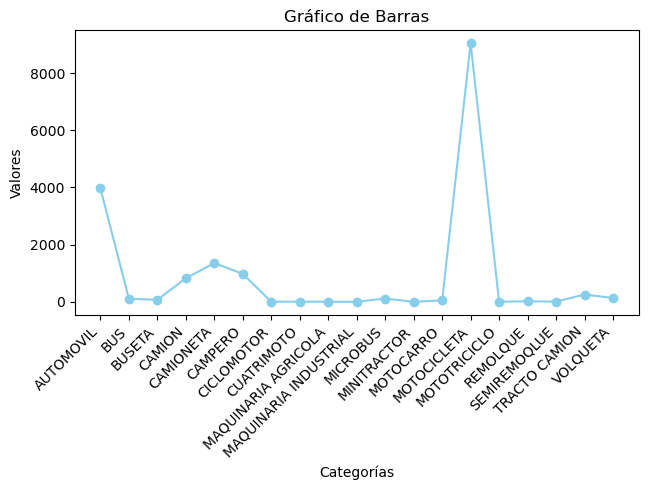

In [326]:
categorias =df['VEHICULOS']
valores = df['CANTIDAD']

mpl.plot(categorias, valores, color='skyblue',marker='o')
mpl.title('Gráfico de Barras')
mpl.xticks(rotation=45, ha='right')
mpl.tight_layout() 
mpl.xlabel('Categorías')
mpl.ylabel('Valores')
mpl.show() 


In [327]:
datos_especificos = data[data['CLASE'] == 'MOTOCICLETA'][['CLASE', 'MARCA']]

print(datos_especificos)

             CLASE            MARCA
0      MOTOCICLETA           YAMAHA
1      MOTOCICLETA           SUZUKI
2      MOTOCICLETA  AUTECO KAWASAKI
8      MOTOCICLETA          PIAGGIO
9      MOTOCICLETA           SUZUKI
...            ...              ...
16938  MOTOCICLETA            BAJAJ
16939  MOTOCICLETA          VICTORY
16940  MOTOCICLETA            BAJAJ
16941  MOTOCICLETA            BAJAJ
16942  MOTOCICLETA              AKT

[9047 rows x 2 columns]


In [328]:
data_u=datos_especificos.loc[:,["MARCA"]]
datanp=data_u.to_numpy()
clases_unicas_1, conteos_1 = np.unique(datanp, return_counts=True)
print(clases_unicas_1)
df = pd.DataFrame({'MARCA':clases_unicas_1,'CANTIDAD':conteos_1})
top_5 = df.nlargest(5, 'CANTIDAD')
top_5

['ACB' 'ACCURO' 'AKT' 'AMC' 'AUTECO' 'AUTECO BAJAJ' 'AUTECO KAWASAKI'
 'AUTECO KYMCO' 'AVANTI' 'AYCO' 'B.M.W' 'BAJAJ' 'BEISUTE' 'CAGIVA'
 'CHONGQING' 'CHRYSLER' 'CMC' 'CPI' 'HAOMEN' 'HARLEY DAVIDSON' 'HERO'
 'HONDA' 'JAWA' 'JIALING' 'JINCHENG' 'KAWASAKI' 'KAZUKI' 'KEEWAY'
 'KOREMOTO' 'KTM' 'KYMCO' 'KYOTO' 'LIFAN' 'MAX MOTOR' 'MC MOTOR' 'MORINI'
 'NITRO' 'PIAGGIO' 'POLARIS' 'QINGQI' 'SHINERAY MOTOS' 'SIGMA' 'SKYGO'
 'SUKYAMA' 'SUZUKI' 'TITANIA' 'TONGKO' 'TVS' 'UAZ' 'UNITED MOTORS'
 'VERUCCI' 'VESPA' 'VICTORY' 'WEST' 'YAMAHA']


,MARCA,CANTIDAD
54,YAMAHA,2080
44,SUZUKI,1651
11,BAJAJ,1333
21,HONDA,1135
2,AKT,809


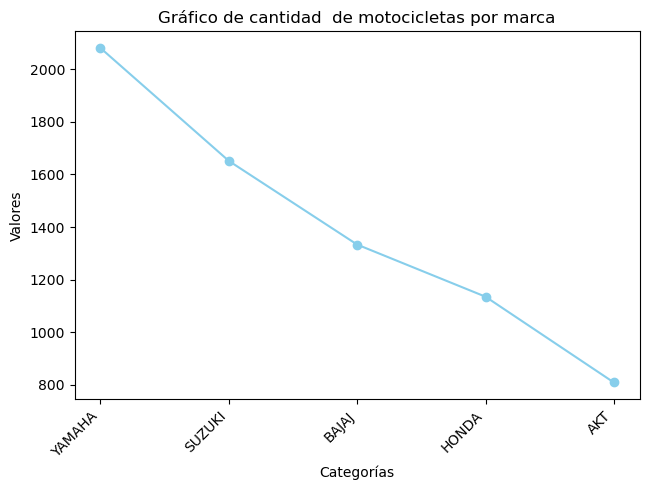

In [329]:
categorias =top_5['MARCA']
valores = top_5['CANTIDAD']
mpl.plot(categorias, valores, color='skyblue',marker='o')
mpl.title('Gráfico de cantidad  de motocicletas por marca')
mpl.xticks(rotation=45, ha='right')
mpl.tight_layout() 
mpl.xlabel('Categorías')
mpl.ylabel('Valores')
mpl.show() 


In [330]:

def cantidad_marca(f):
    datos_especificos = data[data['CLASE'] == f][['CLASE', 'MARCA']]
    data_u=datos_especificos.loc[:,["MARCA"]]
    datanp=data_u.to_numpy()
    clases_unicas, conteos = np.unique(datanp, return_counts=True)
    print(clases_unicas)
    df = pd.DataFrame({'MARCA':clases_unicas,'CANTIDAD':conteos})
    top_5 = df.nlargest(5, 'CANTIDAD')
    categorias =top_5['MARCA']
    valores = top_5['CANTIDAD']
    mpl.plot(categorias, valores, color='skyblue',marker='o')
    mpl.title('Gráfico TOP 5 por marca')
    mpl.xticks(rotation=45, ha='right')
    mpl.tight_layout() 
    mpl.xlabel(f)
    mpl.ylabel('Valores')
    mpl.show()
    

['ABARTH' 'ALFA ROMEO' 'ARO' 'AUDI' 'B.M.W' 'BUICK' 'BYD' 'CHANA'
 'CHANGHE' 'CHEVROLET' 'CHRYSLER' 'CITROEN' 'DACIA' 'DAEWOO' 'DAIHATSU'
 'DATSUN' 'DODGE' 'FIAT' 'FORD' 'GEELY' 'HONDA' 'HYUNDAI' 'KIA' 'LADA'
 'MAZDA' 'MERCEDES BENZ' 'MG' 'MITSUBISHI' 'MORRIS' 'NISSAN' 'OLDSMOBILE'
 'PEUGEOT' 'PONTIAC' 'RENAULT' 'ROVER' 'SEAT' 'SIMCA' 'SKODA' 'STUDEBAKER'
 'SUZUKI' 'TOYOTA' 'VOLKSWAGEN' 'WARZAMA' 'ZASTAVA']


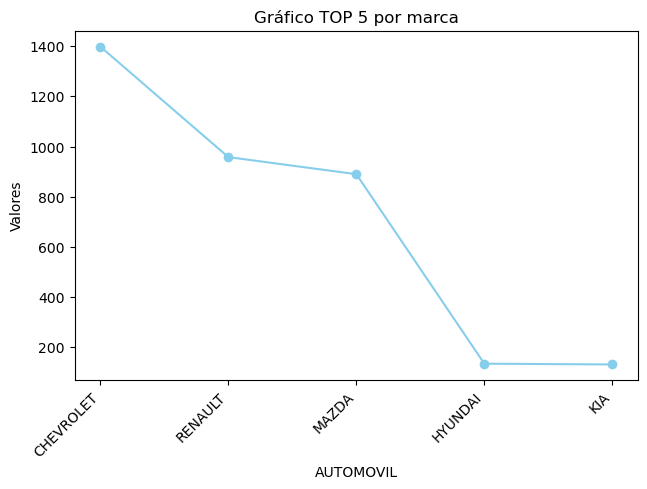

['ABARTH' 'CHEVROLET' 'DODGE' 'FORD' 'HINO' 'MERCEDES BENZ' 'MERCURY'
 'NON PLUS ULTRA' 'SCANIA']


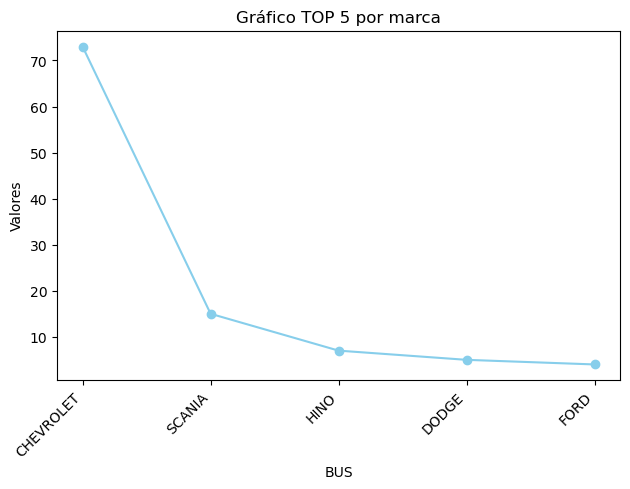

['CHEVROLET' 'DODGE' 'JAC' 'KIA' 'MAZDA' 'MERCEDES BENZ' 'NISSAN'
 'NON PLUS ULTRA' 'VOLKSWAGEN']


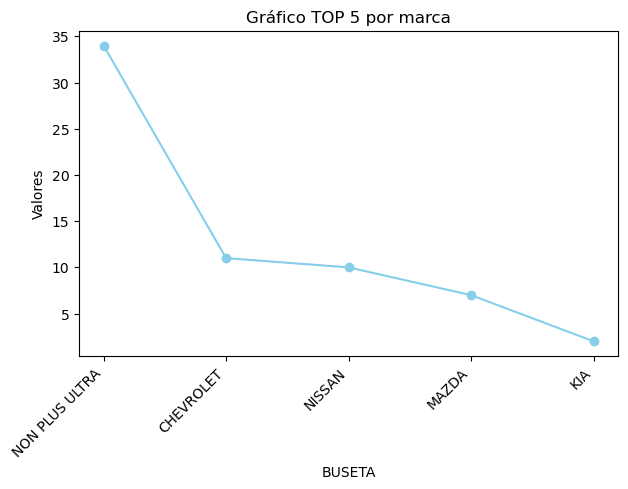

['ARO' 'CHEVROLET' 'DAIHATSU' 'DINA' 'DODGE' 'FARGO' 'FIAT' 'FORD' 'FOTON'
 'FREIGHTLINER' 'GMC' 'HINO' 'HYUNDAI' 'INTERNATIONAL' 'ISUZU' 'IVECO'
 'JAC' 'JMC' 'KENWORTH' 'KIA' 'MACK' 'MAZDA' 'MERCEDES BENZ' 'MERCURY'
 'MITSUBISHI' 'MITSUBISHI FUSO' 'NISSAN' 'PEGASSO' 'RENAULT' 'SIZU'
 'VOLKSWAGEN' 'VOLVO' 'WILLYS']


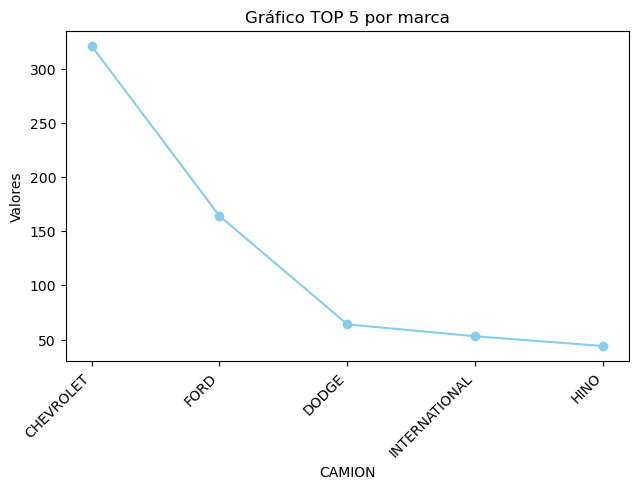

['ABARTH' 'ACCURO' 'ARO' 'CHANA' 'CHANGHE' 'CHERY' 'CHEVROLET' 'CHRYSLER'
 'CITROEN' 'DAEWOO' 'DAF' 'DAIHATSU' 'DFM' 'DODGE' 'FARGO' 'FIAT' 'FORD'
 'GMC' 'GREATWALL' 'HAFEI' 'HONDA' 'HYUNDAI' 'INTERNATIONAL' 'ISUZU'
 'IVECO' 'JEEP' 'KIA' 'KIAMASTER' 'MAHINDRA' 'MAZDA' 'MERCURY'
 'MITSUBISHI' 'NISSAN' 'RENAULT' 'SAIC-WULING' 'SIZU' 'SKODA' 'SSANGYONG'
 'SUBARU' 'SUZUKI' 'TATA' 'TOYOTA' 'VOLKSWAGEN' 'WILLYS' 'ZHONGXING'
 'ZOTYE']


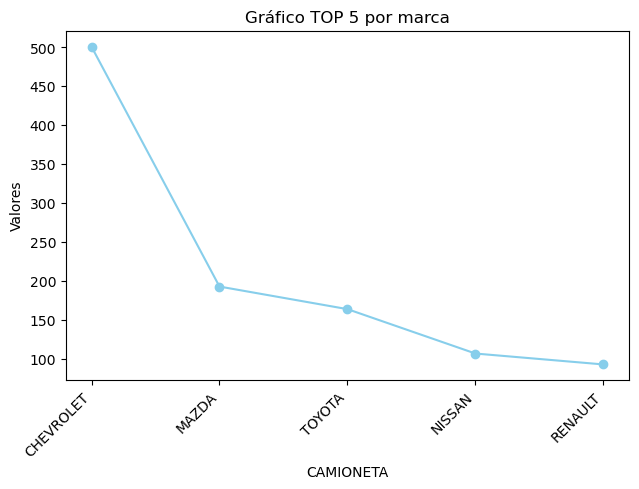

['ABARTH' 'AGRALE' 'ALFA ROMEO' 'AMERICAN MOTOR' 'ARO' 'B.M.W' 'CHEVROLET'
 'DAIHATSU' 'DATSUN' 'DELTA' 'EBRO' 'FORD' 'GAZ' 'HONDA' 'HYUNDAI' 'JEEP'
 'KIA' 'LADA' 'LAND ROVER' 'MITSUBISHI' 'NISSAN' 'RENAULT' 'SSANGYONG'
 'SUBARU' 'SUZUKI' 'TOYOTA' 'UAZ' 'VOLKSWAGEN' 'WILLYS']


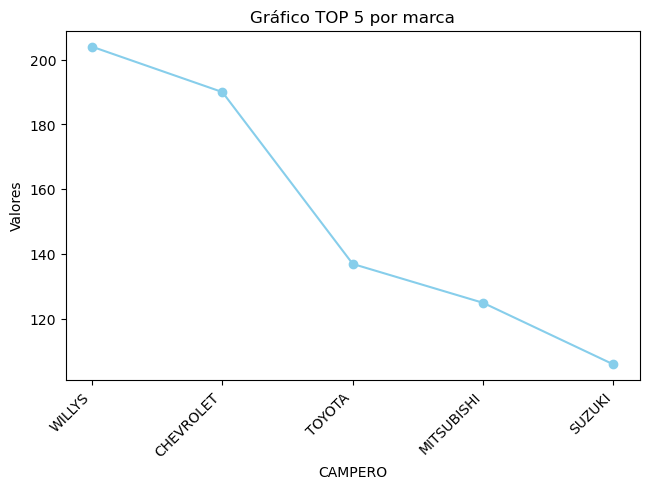

['YAMAHA']


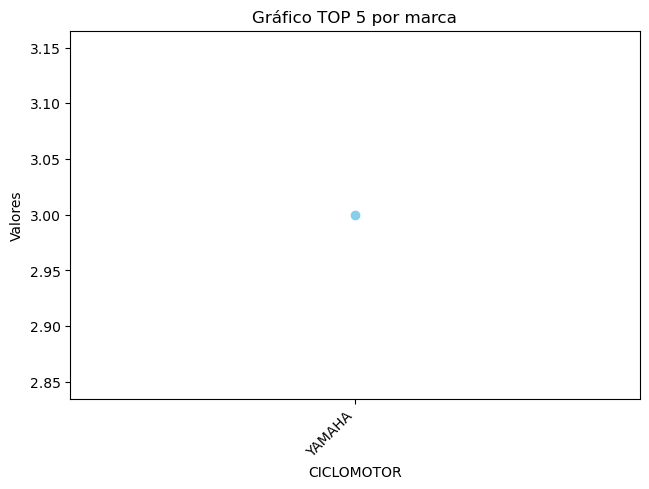

['BOMBARDIER' 'POLARIS' 'YAMAHA']


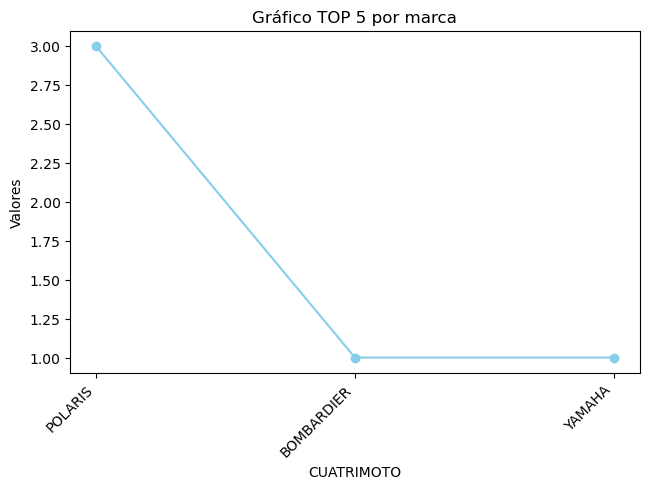

['JHON DEERE' 'NEW HOLLAN']


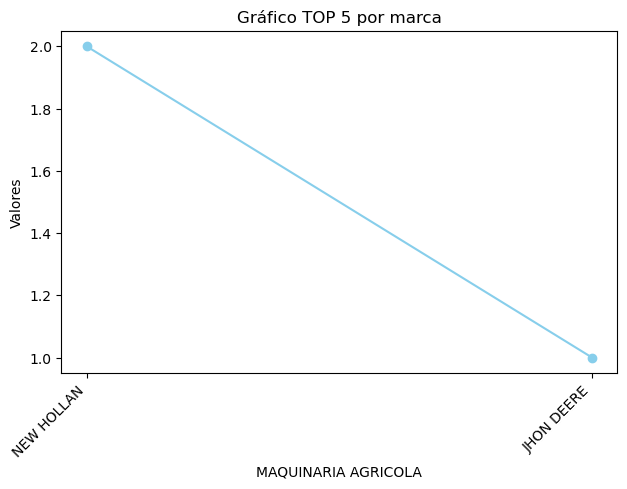

['CATERPILLAR']


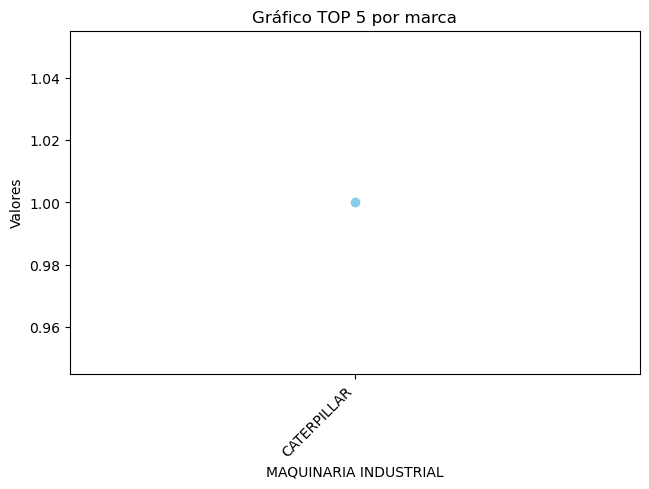

['ABARTH' 'ASIA MOTOR' 'CHEVROLET' 'DAEWOO' 'FORD' 'HAFEI' 'HYUNDAI'
 'IVECO' 'KIA' 'MERCEDES BENZ' 'MITSUBISHI' 'NISSAN' 'NON PLUS ULTRA'
 'RENAULT' 'TOYOTA' 'VOLKSWAGEN']


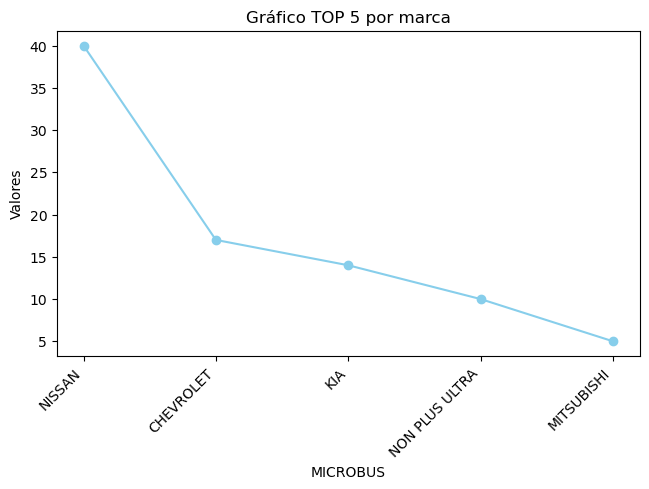

['CHRYSLER']


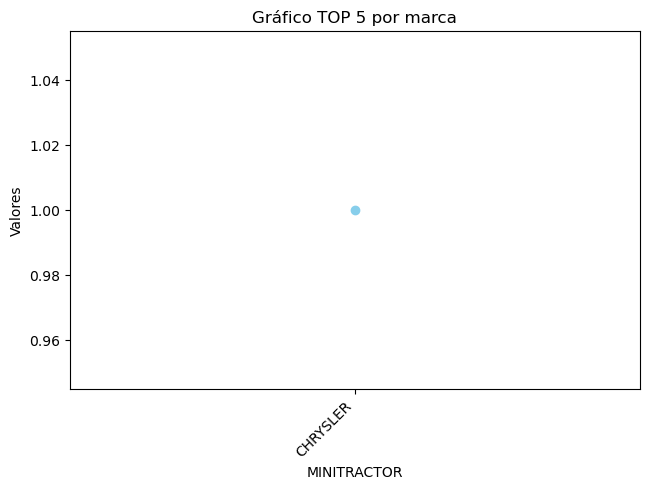

['AKT' 'ARO' 'AYCO' 'BAJAJ' 'JINCHENG' 'PIAGGIO']


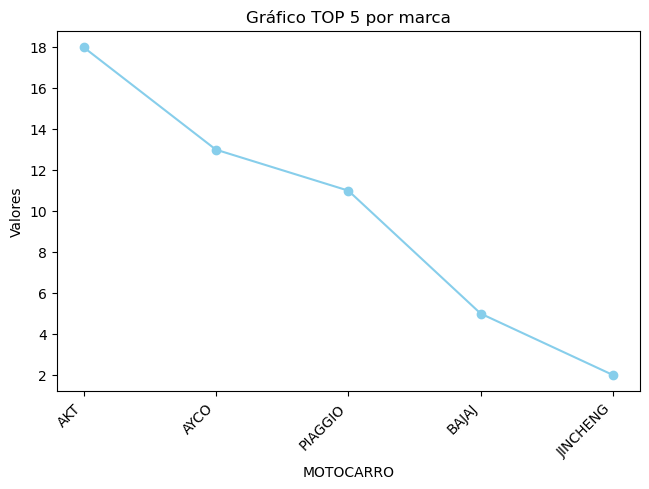

['ACB' 'ACCURO' 'AKT' 'AMC' 'AUTECO' 'AUTECO BAJAJ' 'AUTECO KAWASAKI'
 'AUTECO KYMCO' 'AVANTI' 'AYCO' 'B.M.W' 'BAJAJ' 'BEISUTE' 'CAGIVA'
 'CHONGQING' 'CHRYSLER' 'CMC' 'CPI' 'HAOMEN' 'HARLEY DAVIDSON' 'HERO'
 'HONDA' 'JAWA' 'JIALING' 'JINCHENG' 'KAWASAKI' 'KAZUKI' 'KEEWAY'
 'KOREMOTO' 'KTM' 'KYMCO' 'KYOTO' 'LIFAN' 'MAX MOTOR' 'MC MOTOR' 'MORINI'
 'NITRO' 'PIAGGIO' 'POLARIS' 'QINGQI' 'SHINERAY MOTOS' 'SIGMA' 'SKYGO'
 'SUKYAMA' 'SUZUKI' 'TITANIA' 'TONGKO' 'TVS' 'UAZ' 'UNITED MOTORS'
 'VERUCCI' 'VESPA' 'VICTORY' 'WEST' 'YAMAHA']


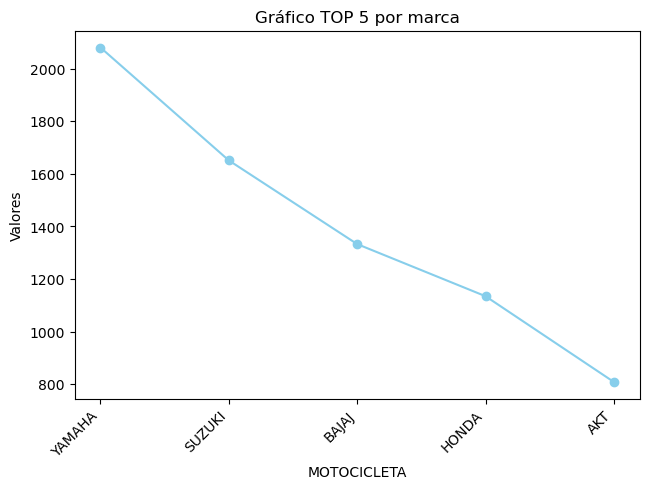

['LIFAN']


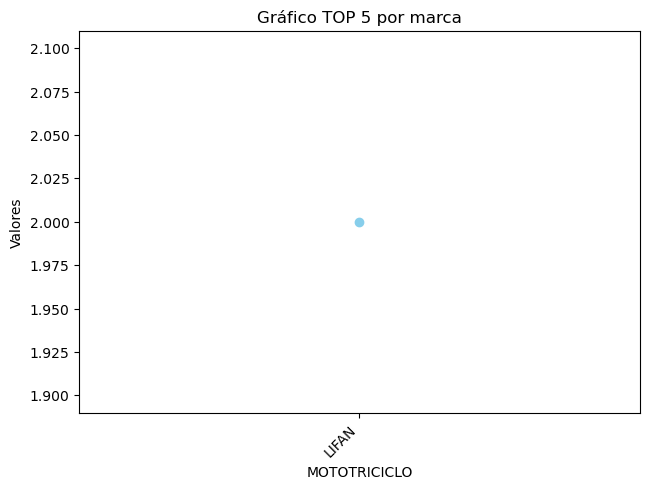

['CAPRI' 'CIMC' 'INCA FRUEHAUF' 'ROMARCO']


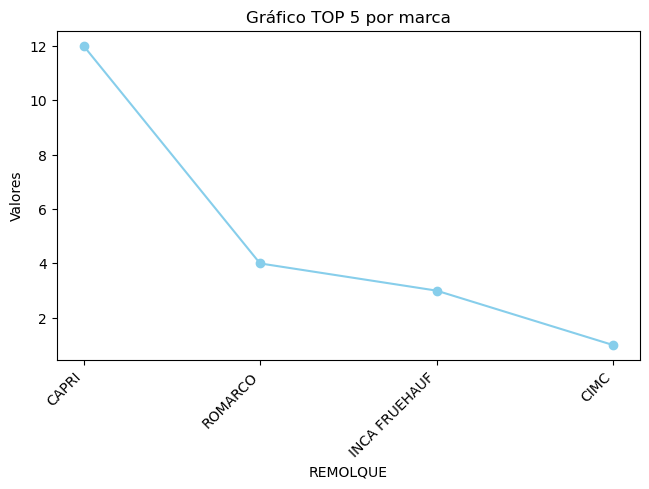

['CAPRI' 'INCA FRUEHAUF' 'ROMARCO']


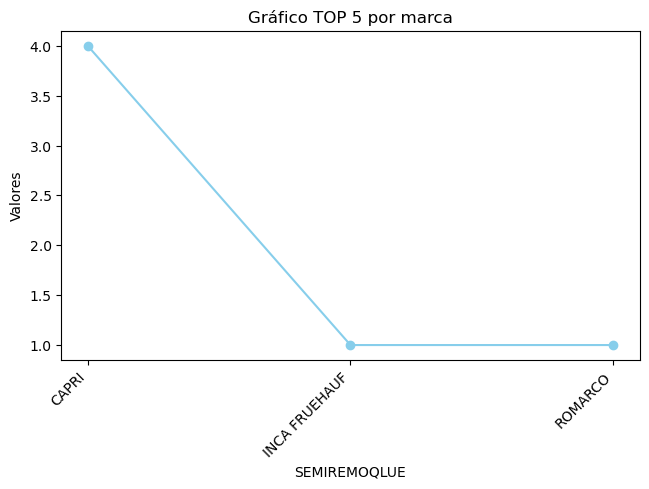

['ARO' 'AUTOCAR' 'BUSSING' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FORD'
 'FREIGHTLINER' 'HINO' 'INTERNATIONAL' 'IVECO' 'KENWORTH' 'MACK' 'RENAULT'
 'SCANIA BABIS' 'SHACMAN' 'SIZU' 'VOLVO' 'WHITE']


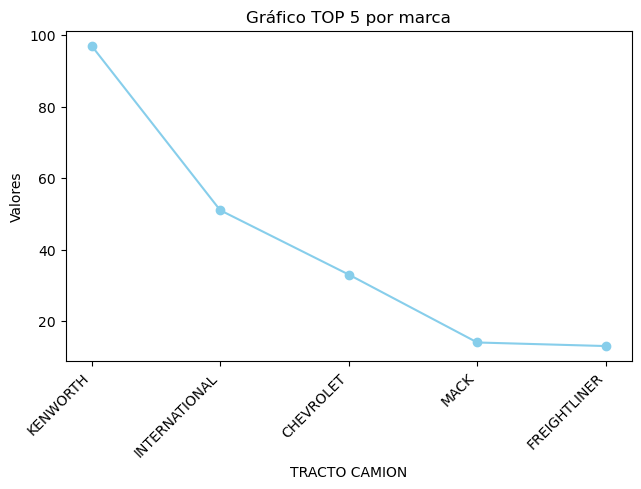

['CHEVROLET' 'DINA' 'DODGE' 'FIAT' 'FORD' 'FREIGHTLINER' 'HINO'
 'INTERNATIONAL' 'ISUZU' 'KENWORTH' 'MACK' 'PEGASSO' 'RENAULT' 'VOLVO']


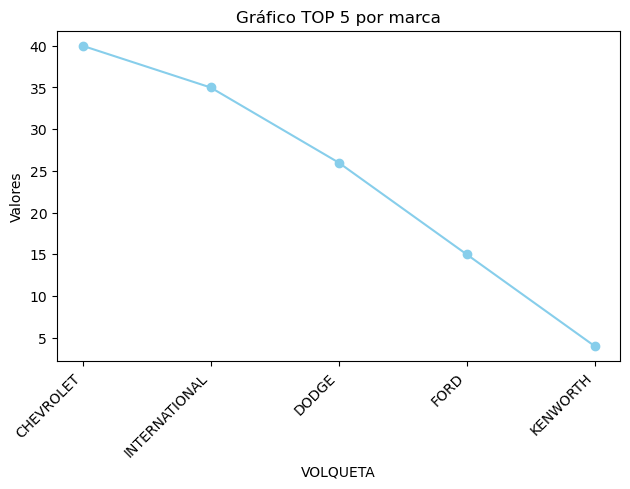

In [331]:
for i in clases_unicas:
    cantidad_marca(i)

In [374]:
rango=np.unique(data['AÑO'])


In [444]:
años=[]
for i in rango:
    datos_especificos = data[data['AÑO'] == i][['AÑO','CLASE']]
    datos_especificos
    data_u=datos_especificos.loc[:,["CLASE"]]
    datanp=data_u.to_numpy()
    clases_unicas_1, conteos_1 = np.unique(datanp, return_counts=True)
    df = pd.DataFrame({'MARCA':clases_unicas_1,'CANTIDAD':conteos_1})
    top_1 = df.nlargest(1, 'CANTIDAD')
    print(top_1)
    data_u=top_1.loc[:]
    valores=data_u.to_numpy()
    años=np.append(años,valores)

         MARCA  CANTIDAD
8  MOTOCICLETA       313
         MARCA  CANTIDAD
7  MOTOCICLETA       333
         MARCA  CANTIDAD
8  MOTOCICLETA       366
         MARCA  CANTIDAD
7  MOTOCICLETA       631
         MARCA  CANTIDAD
7  MOTOCICLETA       688
         MARCA  CANTIDAD
8  MOTOCICLETA       316
         MARCA  CANTIDAD
8  MOTOCICLETA       627
         MARCA  CANTIDAD
8  MOTOCICLETA       713
         MARCA  CANTIDAD
9  MOTOCICLETA       370
         MARCA  CANTIDAD
9  MOTOCICLETA       344
         MARCA  CANTIDAD
6  MOTOCICLETA       462
         MARCA  CANTIDAD
8  MOTOCICLETA       541
         MARCA  CANTIDAD
8  MOTOCICLETA       352
         MARCA  CANTIDAD
8  MOTOCICLETA       637
         MARCA  CANTIDAD
7  MOTOCICLETA       458
         MARCA  CANTIDAD
8  MOTOCICLETA       419
         MARCA  CANTIDAD
7  MOTOCICLETA       252
         MARCA  CANTIDAD
6  MOTOCICLETA       329
         MARCA  CANTIDAD
7  MOTOCICLETA       205
         MARCA  CANTIDAD
8  MOTOCICLETA       238


In [446]:
print(años)

['MOTOCICLETA' 313 'MOTOCICLETA' 333 'MOTOCICLETA' 366 'MOTOCICLETA' 631
 'MOTOCICLETA' 688 'MOTOCICLETA' 316 'MOTOCICLETA' 627 'MOTOCICLETA' 713
 'MOTOCICLETA' 370 'MOTOCICLETA' 344 'MOTOCICLETA' 462 'MOTOCICLETA' 541
 'MOTOCICLETA' 352 'MOTOCICLETA' 637 'MOTOCICLETA' 458 'MOTOCICLETA' 419
 'MOTOCICLETA' 252 'MOTOCICLETA' 329 'MOTOCICLETA' 205 'MOTOCICLETA' 238
 'AUTOMOVIL' 190 'AUTOMOVIL' 218 'MOTOCICLETA' 95]


In [448]:
arreglo=np.array(años)
arreglo

array(['MOTOCICLETA', 313, 'MOTOCICLETA', 333, 'MOTOCICLETA', 366,
       'MOTOCICLETA', 631, 'MOTOCICLETA', 688, 'MOTOCICLETA', 316,
       'MOTOCICLETA', 627, 'MOTOCICLETA', 713, 'MOTOCICLETA', 370,
       'MOTOCICLETA', 344, 'MOTOCICLETA', 462, 'MOTOCICLETA', 541,
       'MOTOCICLETA', 352, 'MOTOCICLETA', 637, 'MOTOCICLETA', 458,
       'MOTOCICLETA', 419, 'MOTOCICLETA', 252, 'MOTOCICLETA', 329,
       'MOTOCICLETA', 205, 'MOTOCICLETA', 238, 'AUTOMOVIL', 190,
       'AUTOMOVIL', 218, 'MOTOCICLETA', 95], dtype=object)

In [450]:
df_2 =pd.DataFrame(arreglo)

df_2

,0
0,MOTOCICLETA
1,313
2,MOTOCICLETA
3,333
4,MOTOCICLETA
5,366
6,MOTOCICLETA
7,631
8,MOTOCICLETA
9,688
